# Neural Networks

In [1]:
import numpy as np
import pandas as pd
from pylab import plt, mpl

## Mathematical function

$$f:\mathbb{R}\rightarrow \mathbb{R}, y=2x^2-\frac{1}{3}x^3$$ 

In [2]:
def f(x):
    return 2 * x ** 2 - x ** 3 / 3

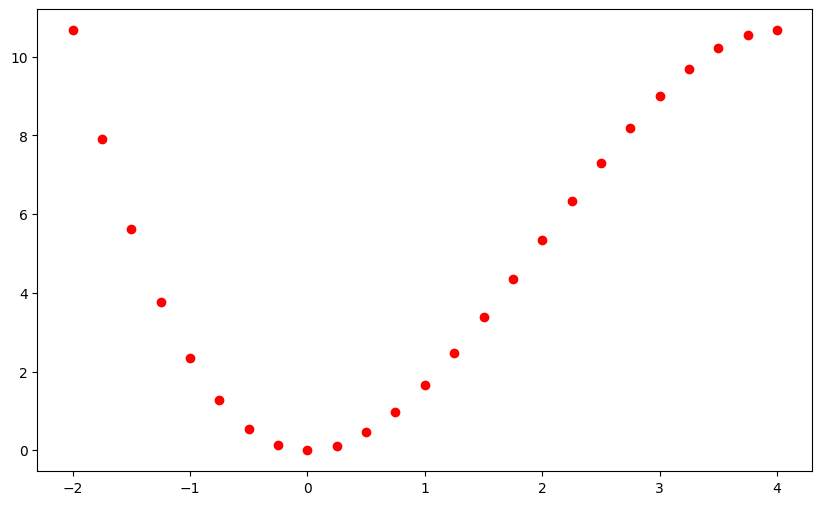

In [3]:
# graph

x = np.linspace(-2, 4, 25)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro')

## OLS Regression

The functional relationship between the input and output values is assumed to be linear and the problem is to find optimal parameter $\alpha$ and $\beta$ for the following linear equation:

$$\hat{f}:\mathbb{R}\rightarrow \mathbb{R}, \hat{y}=\alpha + \beta x$$

The optimization is to minimize the mean sqaured error (MSE) between the real output values and the approximated output values:

$$\min_{\alpha, \beta} \frac{1}{N}\sum_{n}^N(y_n-\hat{f}(x_n))^2$$

The solution $(\alpha^{*}, \beta^{*})$ is kwnown in closed form:

$$ \beta^{*}=\frac{Cov(x, y)}{Var(x)} $$
$$ \alpha^{*}=\bar{y}-\beta\bar{x}$$

In [4]:
np.cov(x, y, ddof=0)

array([[ 3.25      ,  3.42604167],
       [ 3.42604167, 14.33357205]])

In [5]:
beta = np.cov(x, y, ddof=0)[0, 1] / np.var(x)
beta

1.0541666666666667

In [6]:
alpha = y.mean() - beta * x.mean()
alpha

3.8625000000000003

In [7]:
y_ = alpha + beta * x

MSE = ((y - y_) ** 2).mean()
MSE

10.721953125

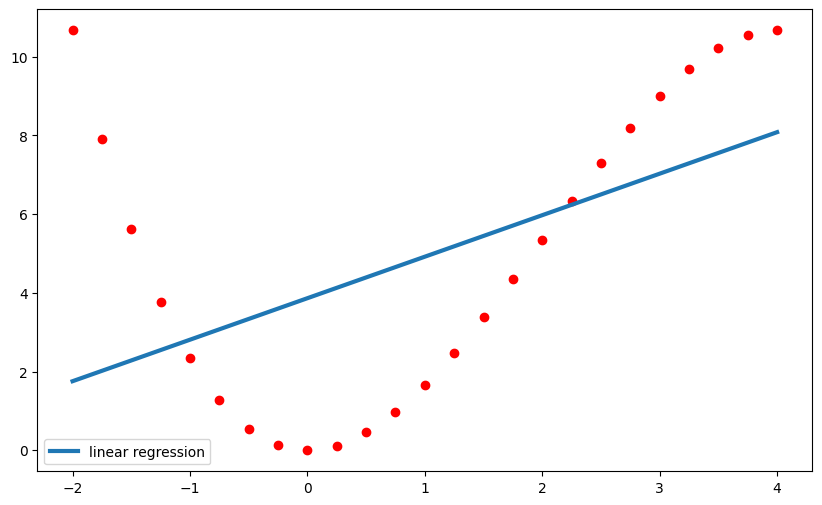

In [8]:
# graph
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro')
plt.plot(x, y_, lw=3.0, label='linear regression')
plt.legend()

The improvement that comes from using quadratic and cubic monomials as basis functions are obvious and also are numerically confirmed by the calculated MSE values.

def=1 | MSE=10.72195
def=2 | MSE=2.31258
def=3 | MSE=0.00000


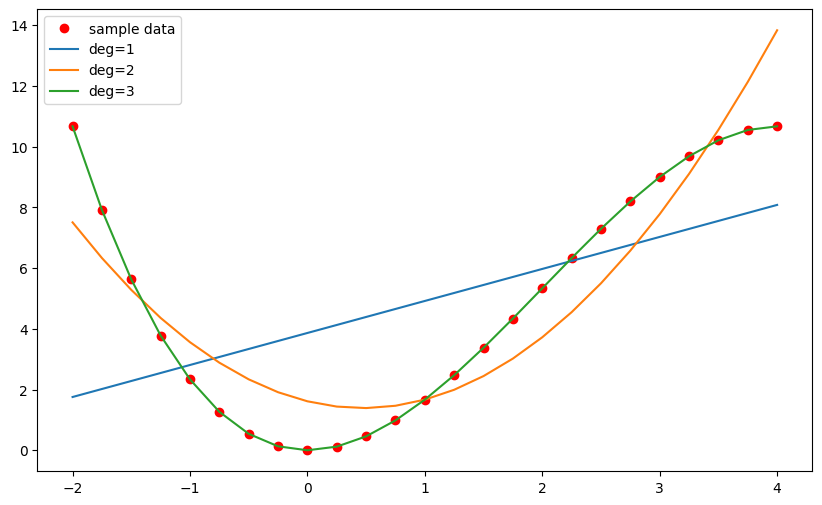

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')

for deg in [1, 2, 3]:
    reg = np.polyfit(x, y, deg=deg)
    
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    
    print(f'def={deg} | MSE={MSE:.5f}')
    
    plt.plot(x, np.polyval(reg, x), label=f"deg={deg}")

plt.legend()

## Estimation with Neural Networks

### Scikit-learn

In [10]:
x

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ])

In [11]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=3 * [256], learning_rate_init=0.05, max_iter=5000)

model.fit(x.reshape(-1, 1), y)

MLPRegressor(hidden_layer_sizes=[256, 256, 256], learning_rate_init=0.05,
             max_iter=5000)

In [12]:
y_ = model.predict(x.reshape(-1, 1))

MSE = ((y - y_) ** 2).mean()
MSE

2.5736013182554065

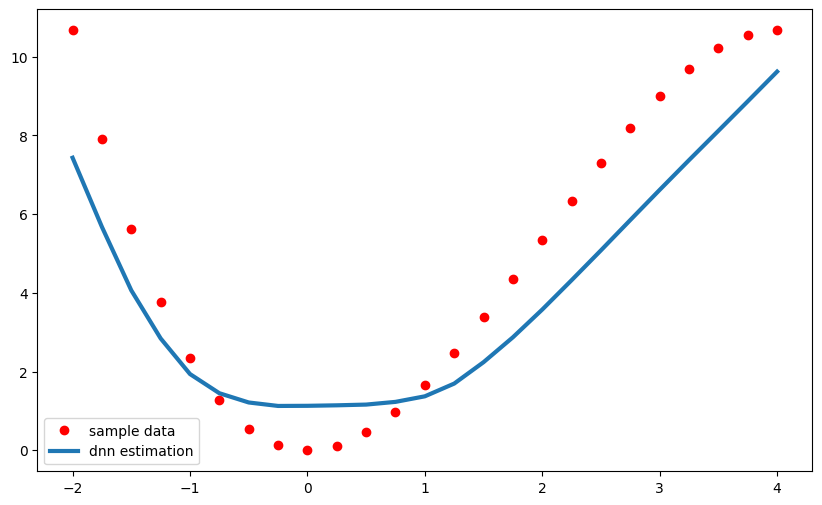

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='dnn estimation')
plt.legend()

Although the OLS regression approach, as shown explitcitly for the simple linear regression, is based on the calculation of certain well-specified quantities and parameters, the nueral network approach relies on incremental learning.

### Keras